# 1.3 Vocabulary.

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import pickle
import nlp_ml_functions
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import operator
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer, binarize
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
sns.set_style('white')

In [3]:
economic_df = pd.read_pickle("full_df")

In [4]:
balanced_df = pd.read_pickle("balanced_df")

In [5]:
X_headline = economic_df['article_headline']
y_headline = economic_df['relevance']

In [6]:
X_article = economic_df['article_text']
y_article = economic_df['relevance']

In [7]:
bag_of_words_headline = CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)

In [8]:
bag_of_words_headline.fit(X_headline)

CountVectorizer(analyzer=<function process_dataframe_text at 0x113ebcbf8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [9]:
print("Total vocabulary words in headlines", len(bag_of_words_headline.vocabulary_))

Total vocabulary words in headlines 7033


In [10]:
bag_of_words_article = CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)

In [11]:
bag_of_words_article.fit(X_article)

CountVectorizer(analyzer=<function process_dataframe_text at 0x113ebcbf8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [12]:
print("Total vocabulary words in articles", len(bag_of_words_article.vocabulary_))

Total vocabulary words in articles 31825


In [13]:
bag_of_words_headline_transformed = bag_of_words_headline.transform(X_headline)

In [14]:
bag_of_words_article_transformed = bag_of_words_article.transform(X_article)

In [15]:
print("Shape of sparse matrix for headlines:", bag_of_words_headline_transformed.shape)

Shape of sparse matrix for headlines: (8000, 7033)


In [16]:
print("Non-zero occurences in sparse matrix for headlines:", bag_of_words_headline_transformed.nnz)

Non-zero occurences in sparse matrix for headlines: 63294


In [17]:
print("Shape of sparse matrix for articles:", bag_of_words_article_transformed.shape)

Shape of sparse matrix for articles: (8000, 31825)


In [18]:
print("Non-zero occurences in sparse matrix for articles:", bag_of_words_article_transformed.nnz)

Non-zero occurences in sparse matrix for articles: 853355


>With balanced dataset.

In [19]:
X_headline = balanced_df['article_headline']
y_headline = balanced_df['relevance']

In [20]:
X_article = balanced_df['article_text']
y_article = balanced_df['relevance']

In [21]:
bag_of_words_headline = CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)

In [22]:
bag_of_words_headline.fit(X_headline)

CountVectorizer(analyzer=<function process_dataframe_text at 0x113ebcbf8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [23]:
print("Total vocabulary words in headlines", len(bag_of_words_headline.vocabulary_))

Total vocabulary words in headlines 3459


In [24]:
bag_of_words_article = CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)

In [25]:
bag_of_words_article.fit(X_article)

CountVectorizer(analyzer=<function process_dataframe_text at 0x113ebcbf8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [26]:
print("Total vocabulary words in articles", len(bag_of_words_article.vocabulary_))

Total vocabulary words in articles 15303


In [27]:
bag_of_words_headline_transformed = bag_of_words_headline.transform(X_headline)

In [28]:
bag_of_words_article_transformed = bag_of_words_article.transform(X_article)

In [29]:
print("Shape of sparse matrix for headlines:", bag_of_words_headline_transformed.shape)

Shape of sparse matrix for headlines: (2400, 3459)


In [30]:
print("Non-zero occurences in sparse matrix for headlines:", bag_of_words_headline_transformed.nnz)

Non-zero occurences in sparse matrix for headlines: 19572


In [31]:
print("Shape of sparse matrix for articles:", bag_of_words_article_transformed.shape)

Shape of sparse matrix for articles: (2400, 15303)


In [32]:
print("Non-zero occurences in sparse matrix for articles:", bag_of_words_article_transformed.nnz)

Non-zero occurences in sparse matrix for articles: 254069


In [33]:
bag_of_words_article.vocabulary_

{'suffrag': 13296,
 'enjoy': 5433,
 'warn': 14810,
 'catapult': 3462,
 'bifida': 2811,
 '3175': 769,
 'ead': 5193,
 'thomson': 13740,
 'devoutli': 4740,
 'encas': 5401,
 'penzer': 10459,
 'era': 5495,
 'borrow': 2988,
 'receipt': 11338,
 'wiiat': 14997,
 'amortis': 2036,
 'mere': 9123,
 'math': 8950,
 'provench': 11034,
 'worthington': 15131,
 'onto': 10041,
 'granger': 6611,
 'allegedli': 1944,
 'cap': 3372,
 'mecheieh': 9064,
 'offbeat': 9965,
 'gonna': 6555,
 'decad': 4551,
 'identifi': 7298,
 'duce': 5137,
 'believ': 2709,
 '4067': 919,
 'whb': 14936,
 'neubig': 9671,
 'bernard': 2759,
 'unabash': 14201,
 'succeed': 13282,
 'sonhug': 12806,
 'teammat': 13571,
 'meet': 9081,
 '535': 1084,
 'lite': 8566,
 '2470': 619,
 'marlin': 8915,
 '13': 207,
 'onslaught': 10039,
 'human': 7200,
 'lalcr': 8260,
 'wl': 15074,
 'crb': 4300,
 'estop': 5553,
 'harrah': 6853,
 'repeatedli': 11545,
 '28b': 702,
 '794': 1375,
 'resembl': 11580,
 'enamor': 5400,
 'side': 12504,
 'danino': 4469,
 'need': 

In [34]:
bag_of_words_article_sorted = sorted(bag_of_words_article.vocabulary_.items(), 
                            key=operator.itemgetter(1),
                            reverse=True)

In [35]:
bag_of_words_article_sample = bag_of_words_article_sorted[:15]
bag_of_words_article_sample

[('zyuganov', 15302),
 ('zynga', 15301),
 ('zurich', 15300),
 ('zuckerberg', 15299),
 ('zorinski', 15298),
 ('zopa', 15297),
 ('zoom', 15296),
 ('zone', 15295),
 ('zoellick', 15294),
 ('zlatku', 15293),
 ('zizheng', 15292),
 ('zip', 15291),
 ('zinder', 15290),
 ('zindcr', 15289),
 ('zinc', 15288)]

In [36]:
labels, values = zip(*bag_of_words_article_sample)

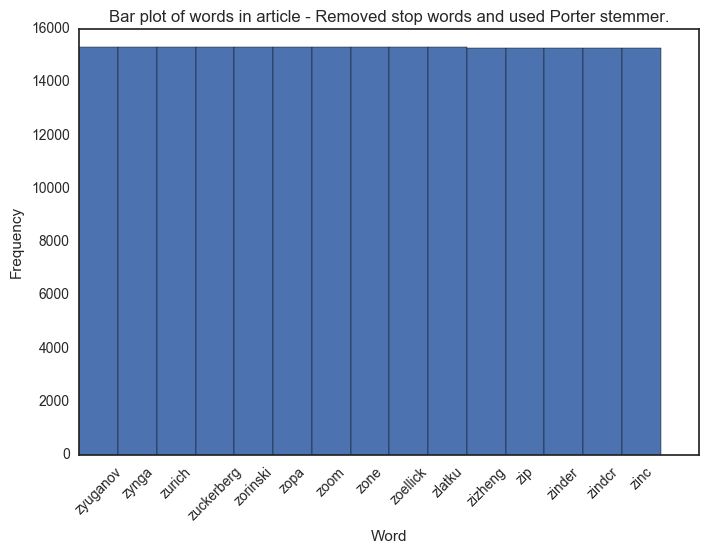

In [37]:
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels,rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Bar plot of words in article - Removed stop words and used Porter stemmer.")
plt.show();

In [38]:
bag_of_words_headline.vocabulary_

{'fame': 1220,
 'australian': 377,
 'nation': 2083,
 'warn': 3350,
 'nw': 2151,
 'thomson': 3111,
 'toe': 3142,
 'era': 1135,
 'borrow': 528,
 'receipt': 2521,
 'fare': 1226,
 'mere': 1978,
 'shrug': 2807,
 'math': 1944,
 'optim': 2187,
 'dangl': 897,
 'takeov': 3062,
 'cap': 624,
 'revis': 2621,
 'gore': 1425,
 'decad': 918,
 'jordanian': 1730,
 'believ': 454,
 'imbal': 1606,
 'internet': 1669,
 'resolv': 2594,
 'neuer': 2103,
 'meet': 1969,
 'kosovo': 1775,
 'weigh': 3375,
 'edg': 1088,
 'church': 713,
 'washington': 3353,
 'nonprofit': 2127,
 '13': 15,
 'longer': 1879,
 'turbul': 3208,
 'real': 2504,
 'scranton': 2730,
 'suburban': 3006,
 'oil': 2173,
 'imag': 1605,
 'stock': 2961,
 'ruin': 2679,
 'corp': 836,
 'treacher': 3179,
 'need': 2092,
 'affirm': 231,
 'attitud': 366,
 'implement': 1614,
 'latin': 1800,
 'jv': 1744,
 'low': 1894,
 'misinterpret': 2020,
 'list': 1861,
 'friedman': 1347,
 'stimul': 2958,
 'buy': 600,
 'p5': 2227,
 '1991': 52,
 'saver': 2708,
 'estat': 1141,
 '

In [39]:
bag_of_words_headline_sorted = sorted(bag_of_words_headline.vocabulary_.items(), 
                            key=operator.itemgetter(1),
                            reverse=True)

In [40]:
bag_of_words_headline_sample = bag_of_words_headline_sorted[:15]
bag_of_words_headline_sample

[('zoom', 3458),
 ('zone', 3457),
 ('zero', 3456),
 ('zarb', 3455),
 ('zap', 3454),
 ('z', 3453),
 ('yuan', 3452),
 ('youth', 3451),
 ('younger', 3450),
 ('york', 3449),
 ('yield', 3448),
 ('yet', 3447),
 ('yesterday', 3446),
 ('yen', 3445),
 ('yellen', 3444)]

In [41]:
labels, values = zip(*bag_of_words_headline_sample)

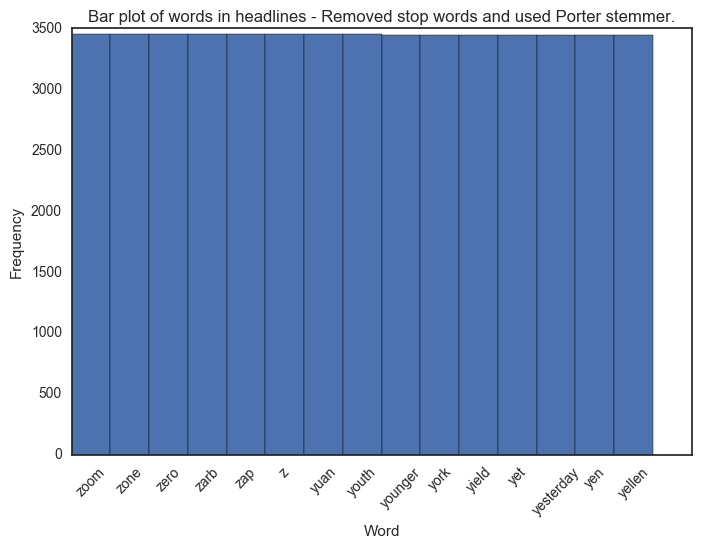

In [42]:
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels,rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Bar plot of words in headlines - Removed stop words and used Porter stemmer.")
plt.show();